# K-means Clustering

### Import resources and display image

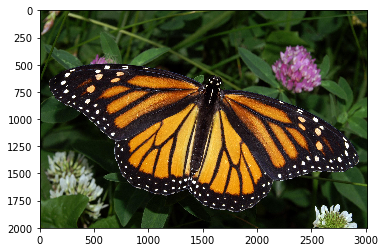

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
## Check out the images directory to see other images you can work with
# And select one!
image = cv2.imread('images/monarch.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

### Prepare data for k-means

In [2]:
# Reshape image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))
print("image shape", image.shape)
print("pixel_vals shape", pixel_vals.shape)

# Convert to float type
pixel_vals = np.float32(pixel_vals)

image shape (2000, 3008, 3)
pixel_vals shape (6016000, 3)


### Implement k-means clustering

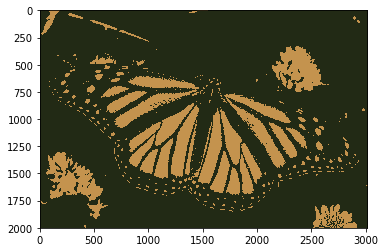

In [7]:
# define stopping criteria
# you can change the number of max iterations for faster convergence!
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.2)

# then perform k-means clustering
k = 2
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8-bit values
centers = np.uint8(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

In [8]:
print("retval", retval)
print("labels", labels.shape)
print("centers", centers.shape)

retval 17654476824.272514
labels (6016000, 1)
centers (2, 3)


Text(0.5,1,'k = 1')

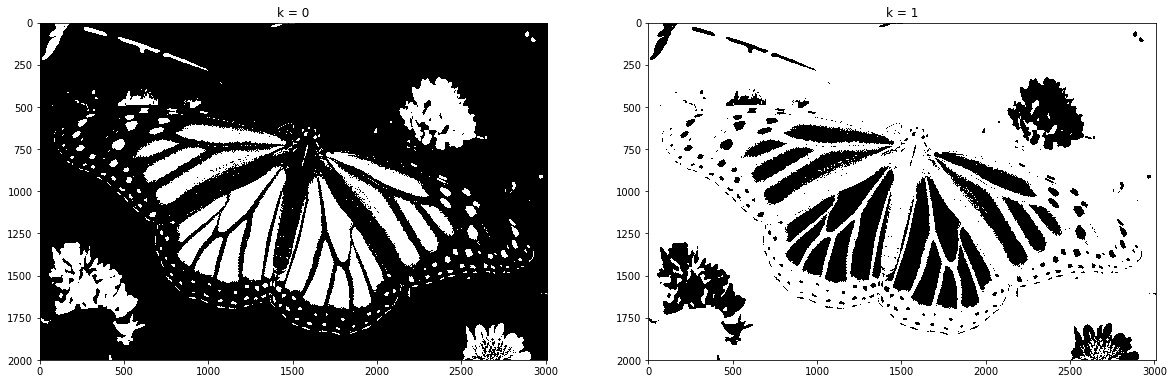

In [17]:
#Visualize one segment, try to find which is the leaves, background, etc!
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 60))
ax1.imshow(labels_reshape==0, cmap='gray')
ax1.set_title("k = 0")
ax2.imshow(labels_reshape==1, cmap='gray')
ax2.set_title("k = 1")

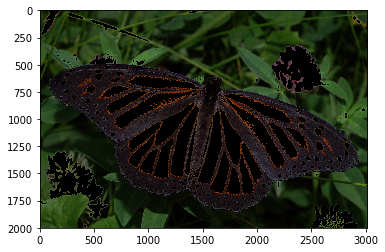

In [23]:
# mask an image segment by cluster

cluster = 0 # the first cluster

masked_image = np.copy(image)
# turn the mask green!
masked_image[labels_reshape == cluster] = [0, 0, 0]

plt.imshow(masked_image)